In [209]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import ast
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

### Read the Dataset (Word2vec embeddings)

In [210]:
dataset = pd.read_csv('test_papers_word2vec.csv')

print(dataset.shape)

dataset['sentence_embeddings'] = dataset['sentence_embeddings'].apply(ast.literal_eval)
dataset['sentences'] = dataset['sentences'].apply(ast.literal_eval)
dataset['keywords'] = dataset['keywords'].apply(ast.literal_eval)
dataset['sections'] = dataset['sections'].apply(ast.literal_eval)

(36, 17)


In [211]:
dataset.head(3)

,paper_id,category,name,num_pages,num_formulas,num_figures,title,keywords,abstract,sections,num_sentences,sent_by_page,partition,text,sentences,sentences_tokenized,sentence_embeddings
0,paper_1,Artificial Intelligence,A Model for Clustering Social Media Data for E...,4,0,4,A Model for Clustering Social Media Data for E...,"[Social Media, Twitter Application Programming...","Through Social media, people are able to write...",{'Introduction': 'Clustering is a descriptive ...,76,25.333333,test,"Through Social media, people are able to write...","[Through Social media, people are able to writ...","[['social', 'media', 'people', 'able', 'write'...","[[0.25343436, 0.012410111, -0.34438372, 0.3019..."
1,paper_2,Artificial Intelligence,An Intelligent System for Traffic Control in S...,8,5,9,An Intelligent System for Traffic Control in S...,"[Smart Cities, Traffic Congestion, Intelligent...",Current traffic light systems use a fixed time...,"{'Introduction': '', 'Background': 'Traffic co...",99,14.142857,test,Current traffic light systems use a fixed time...,[Current traffic light systems use a fixed tim...,"[['current', 'traffic', 'light', 'systems', 'u...","[[0.08013701, -0.043167926, 0.019797344, 0.273..."
2,paper_3,Artificial Intelligence,Architecture Trends of Adaptive Educational Hy...,14,0,12,Architecture Trends of Adaptive Educational Hy...,"[Adaptive Educational Hypermedia Systems, Arch...",The aim of this article is to present the gene...,{'Introduction': 'Adaptive Hypermedia Educatio...,203,15.615385,test,The aim of this article is to present the gene...,[The aim of this article is to present the gen...,"[['aim', 'article', 'present', 'general', 'arc...","[[0.13080898, -0.11806064, -0.047516536, 0.097..."


### Clustering for one paper (Silhouette coefficient)

In [212]:
from tqdm import tqdm
sil_scores = []
X = np.array(dataset.sentence_embeddings.iloc[0])

for i in tqdm(range(2, len(X)//3)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)

    sil_scores.append(silhouette_score(X, pred_y))

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 13.01it/s]


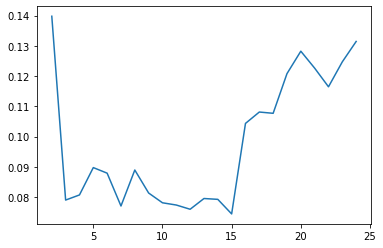

In [213]:
plt.plot(np.arange(2, len(X)//3), sil_scores)

In [214]:
n_cluster_best = np.arange(2, len(X)//3)[np.argmax(sil_scores)]

sil_scores[np.argmax(sil_scores)], n_cluster_best

(0.13978328352985858, 2)

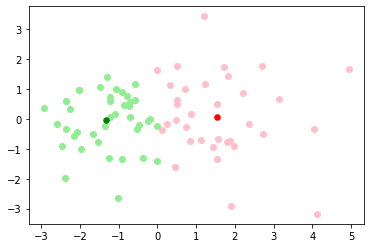

In [215]:
X = np.array(dataset.sentence_embeddings.iloc[0])

kmeans = KMeans(n_clusters=n_cluster_best, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
pca_emb = pca.fit_transform(np.vstack([X, centers]))

plt.scatter(pca_emb[:-2][pred_y == 1][:, 0], pca_emb[:-2][pred_y == 1][:, 1], c = 'lightgreen')
plt.scatter(pca_emb[:-2][pred_y == 0][:, 0], pca_emb[:-2][pred_y == 0][:, 1], c = 'pink')

plt.scatter(pca_emb[-2:][0, 0], pca_emb[-2:][0, 1], s=30, c='red')
plt.scatter(pca_emb[-2:][1, 0], pca_emb[-2:][1, 1], s=30, c='green')

#plt.scatter(pca_emb[-2:][:, 0], pca_emb[-2:][:, 1], s=30, c='red')
plt.show()

In [224]:
predictions_df = pd.DataFrame({'sentence': dataset.sentences.iloc[0], 'embedding': dataset.sentence_embeddings.iloc[0],
                              'cluster': pred_y})

In [225]:
predictions_df

,sentence,embedding,cluster
0,"Through Social media, people are able to write...","[0.25343436, 0.012410111, -0.34438372, 0.30190...",1
1,Through these messages also called status upda...,"[0.110737346, 0.06362086, -0.29996225, 0.13311...",1
2,Tweets and other updates have become so import...,"[0.21838884, -0.055159483, -0.29618284, -0.001...",1
3,They enable interaction among vast groups of p...,"[0.19002154, 0.15716586, -0.09866962, 0.398576...",1
4,These numerous amounts of information can be e...,"[0.054914832, 0.05670376, -0.25033298, 0.13710...",1
5,This paper reports on the successful developme...,"[0.041616052, 0.009724934, -0.61799204, 0.1518...",1
6,This helps in solving the problem of losing vi...,"[0.30368292, -0.033310678, -0.59848756, 0.0985...",1
7,It addresses this limitation by using the data...,"[-0.06096253, -0.22583918, -0.114594005, 0.312...",1
8,Clustering is a descriptive task of data mining.,"[0.11516555, -0.29443333, 0.06990412, -0.14374...",0
9,A cluster is a collection of data objects that...,"[0.23161168, -0.26076385, 0.24521647, 0.373486...",1


In [226]:
predictions_df['distance_from_center'] = predictions_df.apply(lambda row: 
                                              euclidean_distances([row['embedding']], [centers[row['cluster']]]).item(), 
                                              axis = 1)

In [227]:
predictions_df.head()

,sentence,embedding,cluster,distance_from_center
0,"Through Social media, people are able to write...","[0.25343436, 0.012410111, -0.34438372, 0.30190...",1,2.702322
1,Through these messages also called status upda...,"[0.110737346, 0.06362086, -0.29996225, 0.13311...",1,2.219312
2,Tweets and other updates have become so import...,"[0.21838884, -0.055159483, -0.29618284, -0.001...",1,3.232291
3,They enable interaction among vast groups of p...,"[0.19002154, 0.15716586, -0.09866962, 0.398576...",1,3.270436
4,These numerous amounts of information can be e...,"[0.054914832, 0.05670376, -0.25033298, 0.13710...",1,2.364944


In [228]:
summary_len = np.ceil(len(X)/3)
sent_per_cluster = np.ceil(summary_len / n_cluster_best)

summary_len, sent_per_cluster

(26.0, 13.0)

In [239]:
predictions_df.sort_values(['distance_from_center']).iloc[:int(summary_len)].sort_index().sentence.values

array(['Through Social media, people are able to write short messages on their walls to express their sentiments using various social media like Twitter and Facebook.',
       'Through these messages also called status updates, they share and discuss things like news, jokes, business issues and what they go through on a daily basis.',
       'These numerous amounts of information can be extracted, processed and properly utilized in areas like marketing and electronic learning.',
       'This paper reports on the successful development of a way of searching, filtering, organizing and storing the information from social media so that it can be put to some good use in an electronic learning environment.',
       'Clustering uses unsupervised learning technique in finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters.',
       'It can be applied in various fields for instance taxonomy of living things, informati

In [236]:
predictions_df.sort_values(['distance_from_center']).iloc[:int(summary_len)]

,sentence,embedding,cluster,distance_from_center
12,It can be applied in various fields for instan...,"[0.092566684, 0.017338153, -0.011351366, 0.116...",1,1.676563
68,The system was therefore able to address the l...,"[-0.03238319, -0.024154337, -0.3586295, 0.2966...",1,1.784479
64,The system that was developed by the researche...,"[-0.003574444, -0.11883976, -0.51420146, 0.180...",1,1.923329
46,"On this question touching on the overall goal,...","[-0.05585518, -0.020677911, 0.018150475, 0.190...",1,2.074696
69,This paper addresses the limitation of social ...,"[-0.07257537, 0.076280296, -0.41724563, 0.3119...",1,2.086053
1,Through these messages also called status upda...,"[0.110737346, 0.06362086, -0.29996225, 0.13311...",1,2.219312
65,It was able to extract tweets from various soc...,"[0.1399744, -0.07303541, -0.17337859, 0.115192...",1,2.227262
41,This involved picking the details of a new stu...,"[0.08795253, 0.06646443, 0.07709772, 0.2284997...",1,2.275977
5,This paper reports on the successful developme...,"[0.041616052, 0.009724934, -0.61799204, 0.1518...",1,2.278983
45,The first task was to determine if the prototy...,"[-0.05029536, -0.049988545, -0.2671389, 0.3332...",1,2.354609


In [241]:
predictions_df.sort_values(['cluster', 'distance_from_center']).groupby('cluster').head(sent_per_cluster).sort_index().sentence.values

array(['Through these messages also called status updates, they share and discuss things like news, jokes, business issues and what they go through on a daily basis.',
       'These numerous amounts of information can be extracted, processed and properly utilized in areas like marketing and electronic learning.',
       'This paper reports on the successful development of a way of searching, filtering, organizing and storing the information from social media so that it can be put to some good use in an electronic learning environment.',
       'Clustering uses unsupervised learning technique in finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters.',
       'It can be applied in various fields for instance taxonomy of living things, information retrieval from a document, identification of areas of similar land use in an earth observation database, discovering distinct groups by marketers in their customer ba

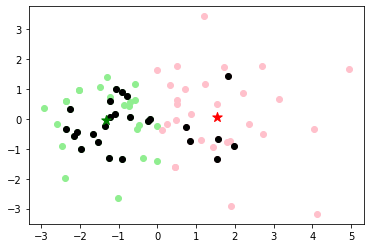

In [208]:
summary_indices = list(predictions_df.sort_values(['distance_from_center']).iloc[:25].index)

X = np.array(dataset.sentence_embeddings.iloc[0])

kmeans = KMeans(n_clusters=n_cluster_best, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
pca_emb = pca.fit_transform(np.vstack([X, centers]))

plt.scatter(pca_emb[:-2][pred_y == 1][:, 0], pca_emb[:-2][pred_y == 1][:, 1], c = 'lightgreen')
plt.scatter(pca_emb[:-2][pred_y == 0][:, 0], pca_emb[:-2][pred_y == 0][:, 1], c = 'pink')

plt.scatter(pca_emb[:-2][summary_indices][:, 0], pca_emb[:-2][summary_indices][:, 1], c = 'black')

plt.scatter(pca_emb[-2:][0, 0], pca_emb[-2:][0, 1], s=100, c='red', marker = '*')
plt.scatter(pca_emb[-2:][1, 0], pca_emb[-2:][1, 1], s=100, c='green', marker = '*')

#plt.scatter(pca_emb[-2:][:, 0], pca_emb[-2:][:, 1], s=30, c='red')
plt.show()

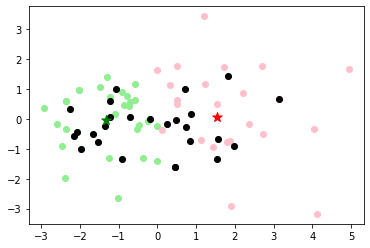

In [207]:
summary_indices = list(predictions_df.sort_values(['cluster', 
                                                   'distance_from_center']).groupby('cluster').head(sent_per_cluster).index)

X = np.array(dataset.sentence_embeddings.iloc[0])
kmeans = KMeans(n_clusters=n_cluster_best, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
pca = PCA(n_components=2)
pca_emb = pca.fit_transform(np.vstack([X, centers]))
plt.scatter(pca_emb[:-2][pred_y == 1][:, 0], pca_emb[:-2][pred_y == 1][:, 1], c = 'lightgreen')
plt.scatter(pca_emb[:-2][pred_y == 0][:, 0], pca_emb[:-2][pred_y == 0][:, 1], c = 'pink')
plt.scatter(pca_emb[:-2][summary_indices][:, 0], pca_emb[:-2][summary_indices][:, 1], c = 'black')
plt.scatter(pca_emb[-2:][0, 0], pca_emb[-2:][0, 1], s=100, c='red', marker = '*')
plt.scatter(pca_emb[-2:][1, 0], pca_emb[-2:][1, 1], s=100, c='green', marker = '*')
plt.show()

### Clustering for all Papers

In [253]:
def cluster_single_paper(paper, top_n = True):
    sil_scores = []
    X = paper['sentence_embeddings']

    for i in range(2, len(X)//3):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        pred_y = kmeans.fit_predict(X)

        sil_scores.append(silhouette_score(X, pred_y))
        
    n_cluster_best = np.arange(2, len(X)//3)[np.argmax(sil_scores)]
    
    print('Best Sihouette score:  ', sil_scores[np.argmax(sil_scores)])
    print('Optimal num. of cluster:', n_cluster_best)
    
    kmeans = KMeans(n_clusters=n_cluster_best, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    
    predictions_df = pd.DataFrame({'sentence': paper['sentences'], 'embedding': paper['sentence_embeddings'],
                              'cluster': pred_y})
    
    predictions_df['distance_from_center'] = predictions_df.apply(lambda row: 
                                              euclidean_distances([row['embedding']], [centers[row['cluster']]]).item(), 
                                              axis = 1)
    
    summary_len = np.ceil(len(X)/3)
    print('Summary length:', summary_len)
    
    if top_n:
        summary = predictions_df.sort_values(['distance_from_center']).iloc[:int(summary_len)].sort_index().sentence.values
    else:
        sent_per_cluster = np.ceil(summary_len / n_cluster_best)
        summary = predictions_df.sort_values(['cluster', 
                                'distance_from_center']).groupby('cluster').head(sent_per_cluster).sort_index().sentence.values
    return summary

In [256]:
for _, row in dataset.iterrows():
    paper_id = row['paper_id']
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(row)
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_word2vec_top_n.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.13978328352985858
Optimal num. of cluster: 2
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.13400909564616634
Optimal num. of cluster: 2
Summary length: 32.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.20214150790098037
Optimal num. of cluster: 2
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.24576710258402495
Optimal num. of cluster: 2
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.13245997150130392
Optimal num. of cluster: 3
Summary length: 40.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.1786971827341773
Optimal num. of cluster: 3
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.09274025117347456
Optimal num. of cluster: 8
Summary length: 41.0
-------------

In [257]:
for _, row in dataset.iterrows():
    paper_id = row['paper_id']
    print(f'Processing {paper_id}...')
    summary_sentences = cluster_single_paper(row, False)
    
    summary_text = ' '.join(summary_sentences)

    with open('../results/clust_summaries_word2vec_equal_clusters.txt', 'a+', encoding = 'utf-8') as f:
        f.write('\t'.join([paper_id, summary_text]) + '\n')
        
    print('-'*30)

Processing paper_1...
Best Sihouette score:   0.13978328352985858
Optimal num. of cluster: 2
Summary length: 26.0
------------------------------
Processing paper_2...
Best Sihouette score:   0.13400909564616634
Optimal num. of cluster: 2
Summary length: 32.0
------------------------------
Processing paper_3...
Best Sihouette score:   0.20214150790098037
Optimal num. of cluster: 2
Summary length: 68.0
------------------------------
Processing paper_21...
Best Sihouette score:   0.24576710258402495
Optimal num. of cluster: 2
Summary length: 20.0
------------------------------
Processing paper_31...
Best Sihouette score:   0.13245997150130392
Optimal num. of cluster: 3
Summary length: 40.0
------------------------------
Processing paper_38...
Best Sihouette score:   0.1786971827341773
Optimal num. of cluster: 3
Summary length: 61.0
------------------------------
Processing paper_57...
Best Sihouette score:   0.09274025117347456
Optimal num. of cluster: 8
Summary length: 41.0
-------------

In [247]:
cluster_single_paper(dataset.iloc[0], False)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 13.36it/s]

Best Sihouette score:   0.13978328352985858
Optimal num. of cluster: 2
Summary length: 26.0


array(['Through these messages also called status updates, they share and discuss things like news, jokes, business issues and what they go through on a daily basis.',
       'These numerous amounts of information can be extracted, processed and properly utilized in areas like marketing and electronic learning.',
       'This paper reports on the successful development of a way of searching, filtering, organizing and storing the information from social media so that it can be put to some good use in an electronic learning environment.',
       'Clustering uses unsupervised learning technique in finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters.',
       'It can be applied in various fields for instance taxonomy of living things, information retrieval from a document, identification of areas of similar land use in an earth observation database, discovering distinct groups by marketers in their customer ba